In [7]:
import numpy as np
import lifetime_spectro_recon_fit

[[Model]]
    Model(model_func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 500
    # variables        = 2
    chi-square         = 0.20423594
    reduced chi-square = 4.1011e-04
    Akaike info crit   = -3897.54374
    Bayesian info crit = -3889.11452
    R-squared          = 0.99142728
[[Variables]]
    amplitude:  1.00309781 +/- 0.00476971 (0.48%) (init = 1)
    lifetime:   19.9220319 +/- 0.12615979 (0.63%) (init = 20)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, lifetime) = -0.7600


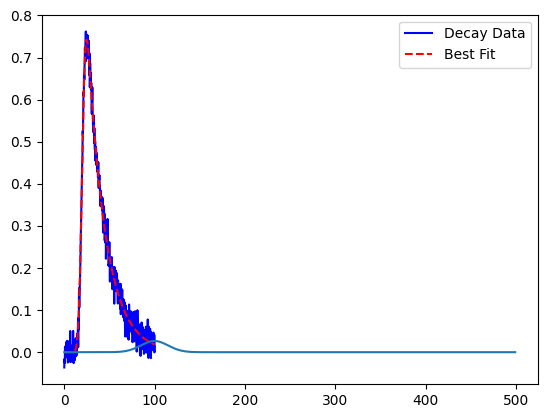

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from lifetime_spectro_recon_fit import reconvolution_fit, irf_convolution, decay_model

def gaussian_irf(t, t0, width):
    """Generate a Gaussian IRF."""
    return np.exp(-0.5 * ((t - t0) / width)**2)

# Simulated data for testing
t = np.linspace(0, 100, 500)
t0 = 20  # Center of the Gaussian IRF
width = 3  # Width of the Gaussian IRF
irf = gaussian_irf(t, t0, width)
irf /= np.sum(irf)  # Normalize IRF

# Initial parameters
initial_params = {'amplitude': 1.0, 'lifetime': 20.0}

# Simulate decay data (convolve true decay with IRF)
true_params = {'amplitude': 1.0, 'lifetime': 20.0}
decay_data = irf_convolution(true_params, t, irf, decay_model) + np.random.normal(0, 0.02, len(t))

# Fit the decay data
result = reconvolution_fit(t, decay_data, irf, initial_params)

# Print fitting results
print(result.fit_report())

# Plot the result
plt.plot(t, decay_data, 'b', label='Decay Data')
plt.plot(t, result.best_fit, 'r--', label='Best Fit')
plt.plot(irf)
plt.legend()
plt.show()